データ構造

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


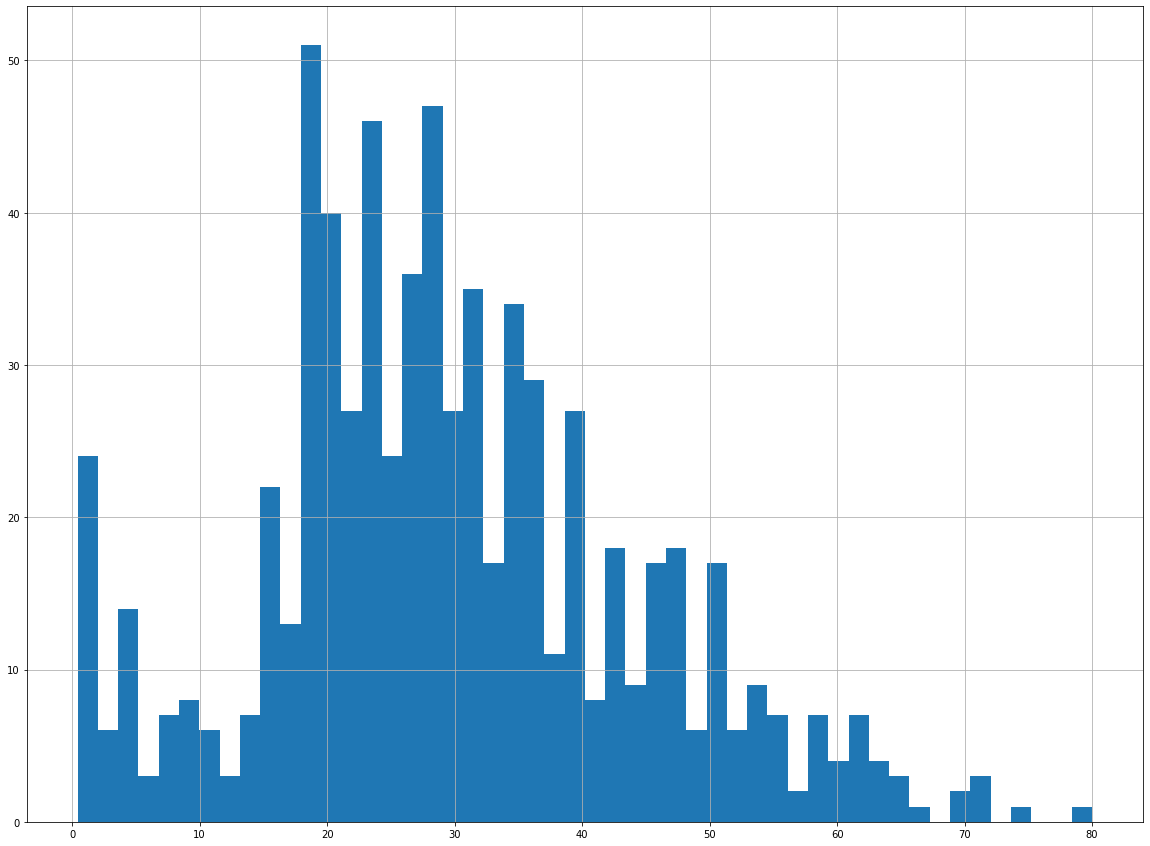

In [12]:
df["Age"].hist(bins=50, figsize=(20, 15));

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
df1 = df.copy()

In [53]:
df1["Cabin"] = df1["Cabin"].fillna(0)

In [54]:
df1[df1["Cabin"] != 0] = 1

In [55]:
df1 = df1.fillna(method="ffill")

In [56]:
df1 = df1.drop(["Name", "Ticket"], 1)

In [57]:
df1 = pd.get_dummies(df1)
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_1,Sex_female,Sex_male,Embarked_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.250,0,0,0,1,0,0,0,1
1,1,1,1,1.0,1,1,1.000,1,1,0,0,1,0,0,0
2,3,1,3,26.0,0,0,7.925,0,0,1,0,0,0,0,1
3,1,1,1,1.0,1,1,1.000,1,1,0,0,1,0,0,0
4,5,0,3,35.0,0,0,8.050,0,0,0,1,0,0,0,1


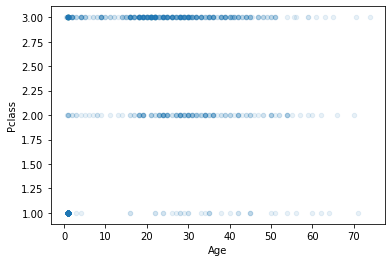

In [58]:
df1.plot(kind="scatter", x="Age", y="Pclass", alpha=0.1);

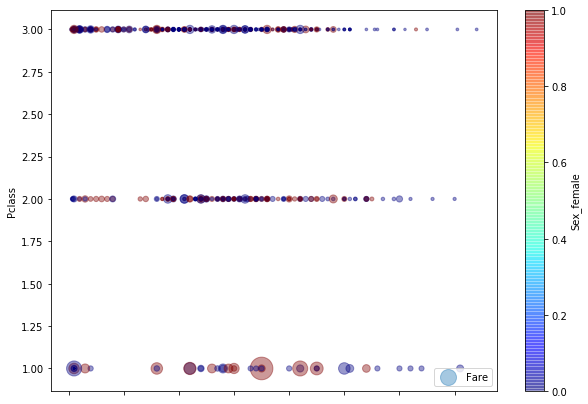

In [61]:
df1.plot(kind="scatter", x="Age", y="Pclass", alpha=0.4,
        s=df1["Fare"], label="Fare", figsize=(10,7),
        c="Sex_female", cmap=plt.get_cmap("jet"), colorbar=True,
        )
plt.legend();